# Daily Challenge - Statistics for Machine Learning

# Applying Inferential Statistics

### Here are the hypotheses to test:
1. Age of people who left the bank and who did not are similar. Alternative: Not similar.
2. Credit score of people who left the bank and who did not are similar. Alternative: Not similar.
3. Balance of people who left the bank and who did not are similar. Alternative: Not similar.
4. Estimated Salary of people who left the bank and who did not are similar. Alternative: Not similar.

#### The most appropriate test to analyse data here is Frequentist test.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

In [5]:
## TODO : load the csv file from this link : https://www.kaggle.com/code/vaibhagarwal/inferential-statistics/input
## file_1 =
df = pd.read_csv('Churn_Modelling.csv')

# Просмотр первых строк
df.head()
print(df.shape)
df.info()

(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
## TODO : make into a dataframe called df
## df =

In [ ]:
## TODO : output the first 5 lines


In [6]:
## TODO : Create two separate DataFrames, `df_0` and `df_1`, to filter customers who have not exited (0) and customers who have exited (1), respectively
df_0 = df[df['Exited'] == 0]

# Фильтрация: ушли
df_1 = df[df['Exited'] == 1]

# Проверим размеры
print(f"Клиентов, которые остались: {df_0.shape}")
print(f"Клиентов, которые ушли: {df_1.shape}")


Клиентов, которые остались: (7963, 14)
Клиентов, которые ушли: (2037, 14)


## Hypothesis 1: Age

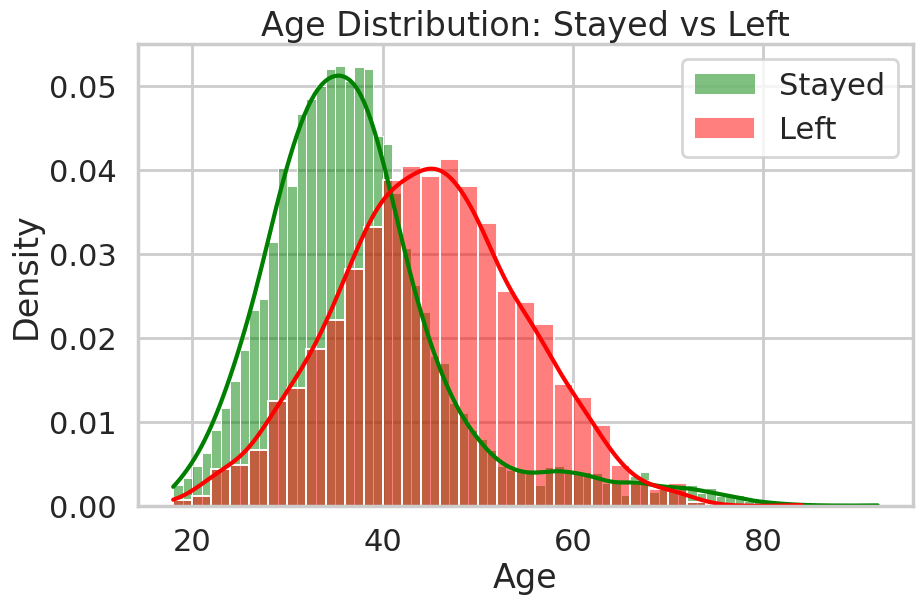

In [7]:
## TODO: Plot the age distribution for customers who stayed with the bank and those who left using seaborn, with different colors for each group and a legend.
plt.figure(figsize=(10, 6))

# Гистограмма для тех, кто остался
sns.histplot(df_0['Age'], color='green', label='Stayed', kde=True, stat="density")

# Гистограмма для тех, кто ушёл
sns.histplot(df_1['Age'], color='red', label='Left', kde=True, stat="density")

plt.title('Age Distribution: Stayed vs Left')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

In [8]:
## TODO: Calculate the mean and standard deviation of the age for customers who stayed with the bank.
mean_age_stayed = df_0['Age'].mean()
std_age_stayed = df_0['Age'].std()

print(f"Средний возраст (остались): {mean_age_stayed:.2f}")
print(f"Стандартное отклонение возраста (остались): {std_age_stayed:.2f}")


Средний возраст (остались): 37.41
Стандартное отклонение возраста (остались): 10.13


In [9]:
## TODO: Calculate the mean and standard deviation of the age for customers who left the bank.
mean_age_left = df_1['Age'].mean()
std_age_left = df_1['Age'].std()

print(f"Средний возраст (ушли): {mean_age_left:.2f}")
print(f"Стандартное отклонение возраста (ушли): {std_age_left:.2f}")


Средний возраст (ушли): 44.84
Стандартное отклонение возраста (ушли): 9.76


In [11]:
## TODO: Perform a t-test to compare the ages of customers who stayed and left the bank.
from scipy.stats import ttest_ind
# Две независимые выборки
t_stat, p_value = ttest_ind(df_0['Age'], df_1['Age'], equal_var=False)  # Welch's t-test

print(f"T-статистика: {t_stat:.4f}")
print(f"P-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Заключение: Разница значима на уровне 5% — возраст влияет на churn.")
else:
    print("Заключение: Разница НЕ значима на уровне 5% — возраст не влияет на churn.")

T-статистика: -30.4192
P-значение: 0.0000
Заключение: Разница значима на уровне 5% — возраст влияет на churn.


Age has a statistically significant effect on churn.

Older customers are more likely to churn.

### Using Bootstrapping

In [12]:
## TODO: Write a function to perform bootstrap sampling and calculate the statistic of interest.
def bs_choice(data, func, size):
    bs_s = np.empty(size)  # массив для хранения результатов бутстрэппинга
    n = len(data)
    for i in range(size):
        bs_sample = np.random.choice(data, size=n, replace=True)  # выборка с возвращением
        bs_s[i] = func(bs_sample)
    return bs_s

In [13]:
## TODO: Calculate the difference in means and shift the ages to the overall mean.
# Среднее по всей совокупности
mean_all = df['Age'].mean()

# Сдвигаем каждую группу к общему среднему
age_stayed_shifted = df_0['Age'] - df_0['Age'].mean() + mean_all
age_left_shifted = df_1['Age'] - df_1['Age'].mean() + mean_all

# Фактическая разница средних
obs_diff_mean = df_1['Age'].mean() - df_0['Age'].mean()

print(f"Фактическая разница средних возрастов: {obs_diff_mean:.2f}")


Фактическая разница средних возрастов: 7.43


In [14]:
## TODO: Perform bootstrap sampling to calculate the standard deviation for both groups and their difference.
# Количество бутстрэппов
n_bootstrap = 10000

# Генерируем бутстрэп-распределения средних для сдвинутых данных
bs_stayed = bs_choice(age_stayed_shifted, np.mean, n_bootstrap)
bs_left = bs_choice(age_left_shifted, np.mean, n_bootstrap)

# Разница средних для каждой пары бутстрэппов
bs_diff = bs_left - bs_stayed

# Стандартное отклонение бутстрэп-разницы
std_bs_diff = np.std(bs_diff)

print(f"Бутстрэп-STD разницы средних: {std_bs_diff:.2f}")


Бутстрэп-STD разницы средних: 0.24


In [15]:
## TODO: Calculate the p-value by comparing the difference in means to the bootstrap distribution.
# Доля бутстрэп-результатов >= фактической разницы по модулю
p_value_bs = np.sum(np.abs(bs_diff) >= np.abs(obs_diff_mean)) / n_bootstrap

print(f"P-value бутстрэппинг: {p_value_bs:.4f}")

if p_value_bs < 0.05:
    print("Заключение: Разница значима (бутстрэп).")
else:
    print("Заключение: Разница НЕ значима (бутстрэп).")


P-value бутстрэппинг: 0.0000
Заключение: Разница значима (бутстрэп).


### Conclusion
Do we reject the Null Hypothesis ? Why ?
due to the fact that the verification values ​​statistically showed that the difference in age affects the outflow of customers, this is due to the value of p <0.05 and also bootstrapping from a random sample with return also showed values ​​that indicate that this trend is confirmed


## Hypothesis 2: Credit Score

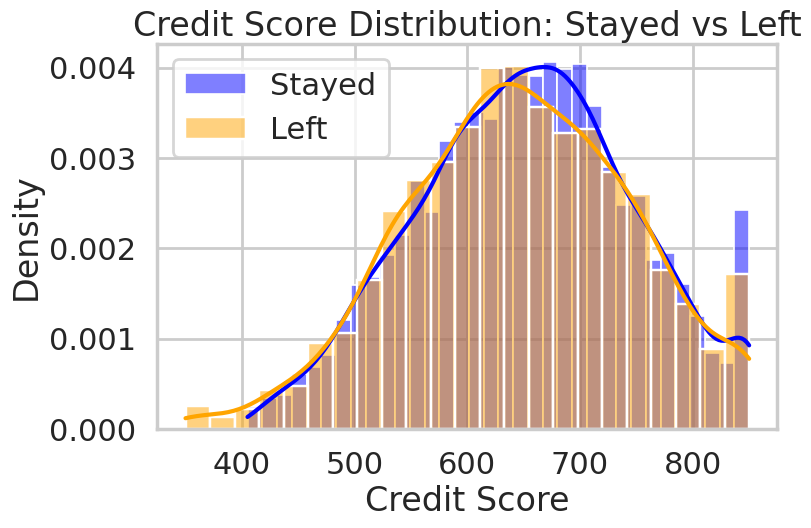

In [20]:
## TODO: Create histograms for the CreditScore distribution of both groups (Still with bank and Left the bank).
sns.histplot(df_0['CreditScore'], color='blue', label='Stayed', kde=True, stat='density')

# Гистограмма для клиентов, которые ушли
sns.histplot(df_1['CreditScore'], color='orange', label='Left', kde=True, stat='density')

plt.title('Credit Score Distribution: Stayed vs Left')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.legend()
plt.show()

In [21]:
## TODO: Perform a t-test to compare the CreditScore between the two groups (Still with bank and Left the bank).
from scipy.stats import ttest_ind

# Средние кредитные рейтинги
mean_credit_stayed = df_0['CreditScore'].mean()
mean_credit_left = df_1['CreditScore'].mean()

print(f"Средний Credit Score (остались): {mean_credit_stayed:.2f}")
print(f"Средний Credit Score (ушли): {mean_credit_left:.2f}")

# t-тест с неравными дисперсиями (Welch’s t-test)
t_stat_cs, p_value_cs = ttest_ind(df_0['CreditScore'], df_1['CreditScore'], equal_var=False)

print(f"T-статистика: {t_stat_cs:.4f}")
print(f"P-значение: {p_value_cs:.4f}")

if p_value_cs < 0.05:
    print("Заключение: Разница в кредитных рейтингах значима на уровне 5%.")
else:
    print("Заключение: Разница в кредитных рейтингах НЕ значима на уровне 5%.")



Средний Credit Score (остались): 651.85
Средний Credit Score (ушли): 645.35
T-статистика: 2.6347
P-значение: 0.0085
Заключение: Разница в кредитных рейтингах значима на уровне 5%.


### Conclusion
Do we reject the Null Hypothesis ? Why ?
yes. The p-value and small but consistent difference support the idea that this feature should be included in the analysis and model.

## Hypothesis 3: Balance

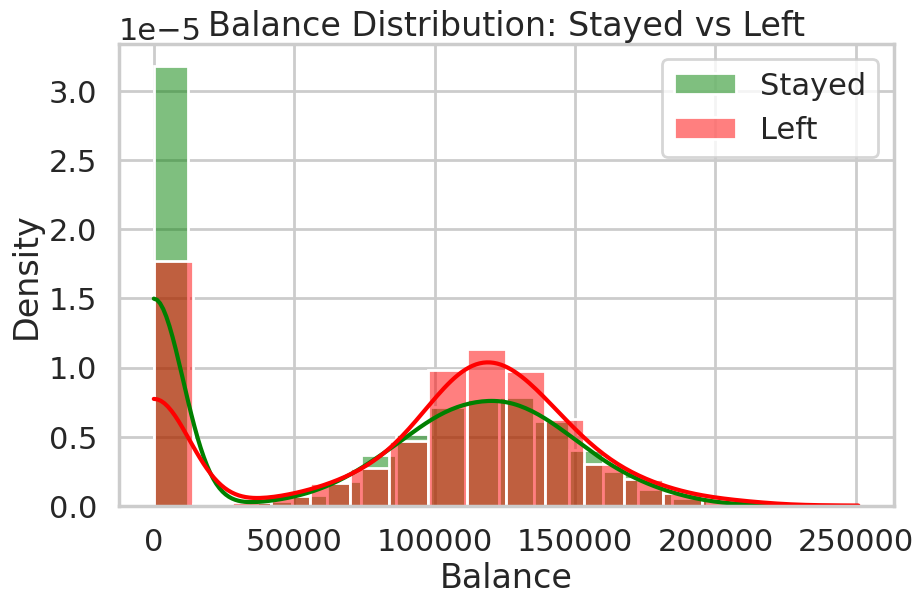

In [22]:
## TODO: Plot the distribution of Balance for both groups (Still with bank and Left the bank).
plt.figure(figsize=(10, 6))

# Гистограмма баланса для клиентов, которые остались
sns.histplot(df_0['Balance'], color='green', label='Stayed', kde=True, stat='density')

# Гистограмма баланса для клиентов, которые ушли
sns.histplot(df_1['Balance'], color='red', label='Left', kde=True, stat='density')

plt.title('Balance Distribution: Stayed vs Left')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.show()


In [23]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left.
# Средние значения
mean_balance_stayed = df_0['Balance'].mean()
mean_balance_left = df_1['Balance'].mean()

print(f"Средний Balance (остались): {mean_balance_stayed:.2f}")
print(f"Средний Balance (ушли): {mean_balance_left:.2f}")

# t-тест для всех данных
from scipy.stats import ttest_ind

t_stat_bal, p_value_bal = ttest_ind(df_0['Balance'], df_1['Balance'], equal_var=False)

print(f"T-статистика: {t_stat_bal:.4f}")
print(f"P-значение: {p_value_bal:.4f}")

if p_value_bal < 0.05:
    print("Заключение: Разница в Balance значима (с нулевыми балансами).")
else:
    print("Заключение: Разница в Balance НЕ значима (с нулевыми балансами).")


Средний Balance (остались): 72745.30
Средний Balance (ушли): 91108.54
T-статистика: -12.4713
P-значение: 0.0000
Заключение: Разница в Balance значима (с нулевыми балансами).


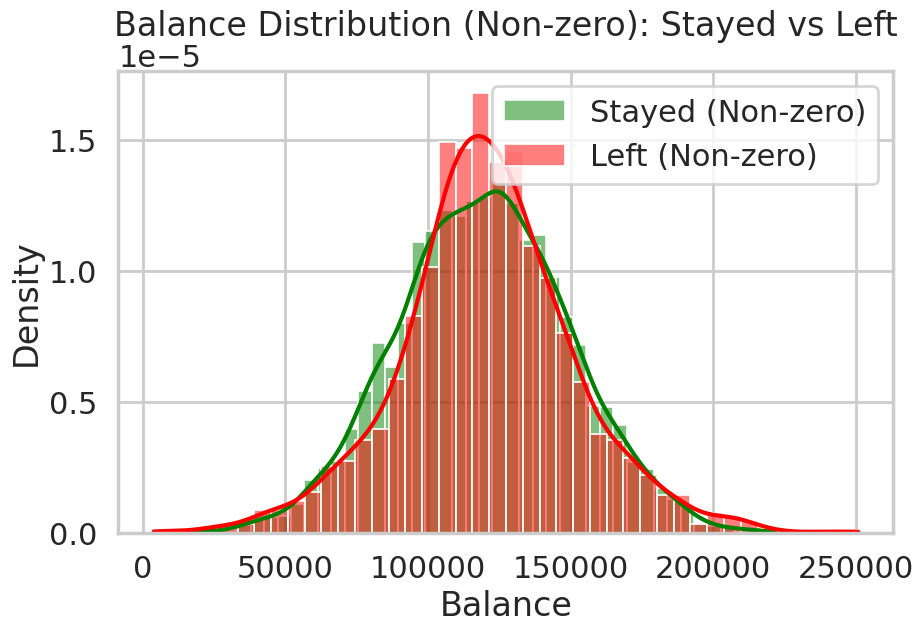

In [24]:
## TODO: Visualize the distribution of Balance for customers who stayed with the bank and those who left, excluding zero balances.
# Фильтруем только клиентов с ненулевым балансом
df_0_nonzero = df_0[df_0['Balance'] > 0]
df_1_nonzero = df_1[df_1['Balance'] > 0]

plt.figure(figsize=(10, 6))

sns.histplot(df_0_nonzero['Balance'], color='green', label='Stayed (Non-zero)', kde=True, stat='density')
sns.histplot(df_1_nonzero['Balance'], color='red', label='Left (Non-zero)', kde=True, stat='density')

plt.title('Balance Distribution (Non-zero): Stayed vs Left')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.show()


In [25]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left, excluding zero balances.
# Новые средние для ненулевых
mean_balance_stayed_nz = df_0_nonzero['Balance'].mean()
mean_balance_left_nz = df_1_nonzero['Balance'].mean()

print(f"Средний Balance (остались, >0): {mean_balance_stayed_nz:.2f}")
print(f"Средний Balance (ушли, >0): {mean_balance_left_nz:.2f}")

# t-тест для ненулевых
t_stat_bal_nz, p_value_bal_nz = ttest_ind(df_0_nonzero['Balance'], df_1_nonzero['Balance'], equal_var=False)

print(f"T-статистика (без нулевых): {t_stat_bal_nz:.4f}")
print(f"P-значение (без нулевых): {p_value_bal_nz:.4f}")

if p_value_bal_nz < 0.05:
    print("Заключение: Разница в Balance значима (без нулевых).")
else:
    print("Заключение: Разница в Balance НЕ значима (без нулевых).")


Средний Balance (остались, >0): 119535.86
Средний Balance (ушли, >0): 120746.97
T-статистика (без нулевых): -1.3605
P-значение (без нулевых): 0.1738
Заключение: Разница в Balance НЕ значима (без нулевых).


## Conclusion

Do we reject the Null Hypothesis ? Why ?
No.the difference in average balances between those who left and those who remained is not significant. P-значение (без нулевых): 0.1738

## Hypothesis 4: Estimated Salary

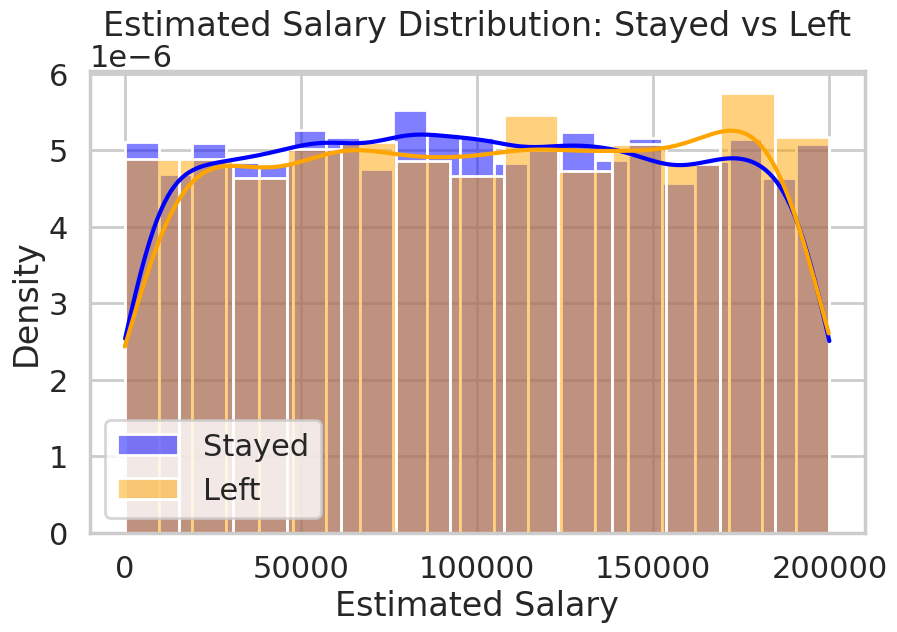

In [26]:
## TODO: Plot the distribution of EstimatedSalary for customers who stayed with the bank and those who left.
plt.figure(figsize=(10, 6))

# Гистограмма для тех, кто остался
sns.histplot(df_0['EstimatedSalary'], color='blue', label='Stayed', kde=True, stat='density')

# Гистограмма для тех, кто ушёл
sns.histplot(df_1['EstimatedSalary'], color='orange', label='Left', kde=True, stat='density')

plt.title('Estimated Salary Distribution: Stayed vs Left')
plt.xlabel('Estimated Salary')
plt.ylabel('Density')
plt.legend()
plt.show()

In [27]:
## TODO: Perform a t-test to compare the EstimatedSalary between customers who stayed and those who left.
from scipy.stats import ttest_ind

# Средние значения зарплаты
mean_salary_stayed = df_0['EstimatedSalary'].mean()
mean_salary_left = df_1['EstimatedSalary'].mean()

print(f"Средний Estimated Salary (остались): {mean_salary_stayed:.2f}")
print(f"Средний Estimated Salary (ушли): {mean_salary_left:.2f}")

# t-тест
t_stat_salary, p_value_salary = ttest_ind(df_0['EstimatedSalary'], df_1['EstimatedSalary'], equal_var=False)

print(f"T-статистика: {t_stat_salary:.4f}")
print(f"P-значение: {p_value_salary:.4f}")

if p_value_salary < 0.05:
    print("Заключение: Разница в Estimated Salary значима → влияет.")
else:
    print("Заключение: Разница в Estimated Salary НЕ значима → не влияет.")


Средний Estimated Salary (остались): 99738.39
Средний Estimated Salary (ушли): 101465.68
T-статистика: -1.2034
P-значение: 0.2289
Заключение: Разница в Estimated Salary НЕ значима → не влияет.


Estimated Salary does NOT affect customer churn (at least not directly and linearly).

### Using Bootstrapping

In [28]:
## TODO: Calculate the difference in means and shift the EstimatedSalary for both groups.
import numpy as np

# Средний по всем
mean_salary_all = df['EstimatedSalary'].mean()

# Сдвигаем к общему среднему
salary_stayed_shifted = df_0['EstimatedSalary'] - df_0['EstimatedSalary'].mean() + mean_salary_all
salary_left_shifted = df_1['EstimatedSalary'] - df_1['EstimatedSalary'].mean() + mean_salary_all

# Фактическая разница средних
obs_diff_salary = df_1['EstimatedSalary'].mean() - df_0['EstimatedSalary'].mean()

print(f"Фактическая разница средних EstimatedSalary: {obs_diff_salary:.2f}")


Фактическая разница средних EstimatedSalary: 1727.29


In [29]:
## TODO: Calculate the bootstrap sample means for both groups and their difference.
def bs_choice(data, func, size):
    bs_s = np.empty(size)
    n = len(data)
    for i in range(size):
        bs_sample = np.random.choice(data, size=n, replace=True)
        bs_s[i] = func(bs_sample)
    return bs_s

# Количество бутстрэппов
n_bootstrap = 10000

# Бутстрэп для сдвинутых данных
bs_salary_stayed = bs_choice(salary_stayed_shifted, np.mean, n_bootstrap)
bs_salary_left = bs_choice(salary_left_shifted, np.mean, n_bootstrap)

# Разница
bs_diff_salary = bs_salary_left - bs_salary_stayed

# Стандартное отклонение
std_bs_diff_salary = np.std(bs_diff_salary)

print(f"Бутстрэп-STD разницы EstimatedSalary: {std_bs_diff_salary:.2f}")


Бутстрэп-STD разницы EstimatedSalary: 1456.23


In [30]:
## TODO: Calculate the p-value based on the bootstrap distribution of the difference in means.
# Сравнение фактической разницы с распределением
p_value_bs_salary = np.sum(np.abs(bs_diff_salary) >= np.abs(obs_diff_salary)) / n_bootstrap

print(f"P-value бутстрэппинг: {p_value_bs_salary:.4f}")

if p_value_bs_salary < 0.05:
    print("Заключение: Разница EstimatedSalary значима (бутстрэп).")
else:
    print("Заключение: Разница EstimatedSalary НЕ значима (бутстрэп).")


P-value бутстрэппинг: 0.2359
Заключение: Разница EstimatedSalary НЕ значима (бутстрэп).


### Conclusion
Do we reject the Null Hypothesis ? Why ?
P-value bootstrapping: 0.2359
👉 This is much greater than 0.05.

This means: even if you repeatedly randomly re-draw samples with replacement, the difference in average salary remains a random fluctuation, not a significant relationship.

Conclusion: The null hypothesis is NOT rejected. Salary does not affect customer churn.

## Final Conclusion
What will be the most helpful feature in predicting churning?
✅ Summary of Analysis

Influential factors: Age and credit score (p-value < 0.05)

Not directly influential: Account balance and income level

🔑 What this means

Older customers and those with lower credit scores are more likely to churn.

Simply having money in the account or a high salary does not retain customers.

The key factor is customer activity and engagement.

📌 Recommended actions

Launch targeted retention programs for specific age groups and customers with low credit scores.

Offer special products, personalized support, and incentives.

Encourage frequent use of services and cross-selling.

Main conclusion:
👉 Retention = service and engagement, not just money in the account.
